In [1]:
%display latex

Based on the [multi variable calculus](https://www.khanacademy.org/math/multivariable-calculus) course challenge.

# Question 1

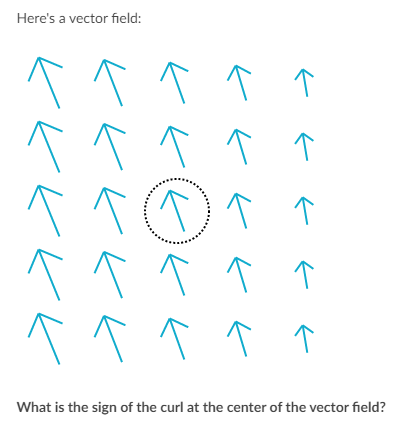

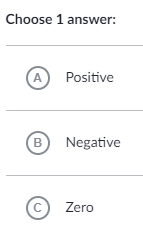

Answer is B.

hint:

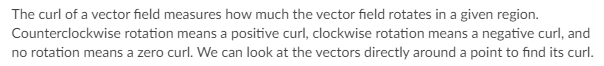

# Question 2*

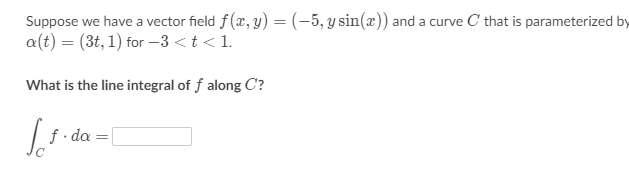

In [13]:
x, y, t = var('x y t')

In [14]:
# define f(x, y) and a(t)
f = vector((-5, y * sin(x)))
a = vector((3*t, 1))

# substitute a(t) into f(x, y)
f_sub = f.substitute({
    x: a[0],
    y: a[1]
})

# define the integrad
integrand = f_sub * a.diff(t)

In [15]:
f

(-5, y*sin(x))

In [16]:
f_sub

(-5, sin(3*t))

In [17]:
integrand

-15

Integrate!

In [18]:
integrate(integrand, t, -3, 1)

-60

Hint:

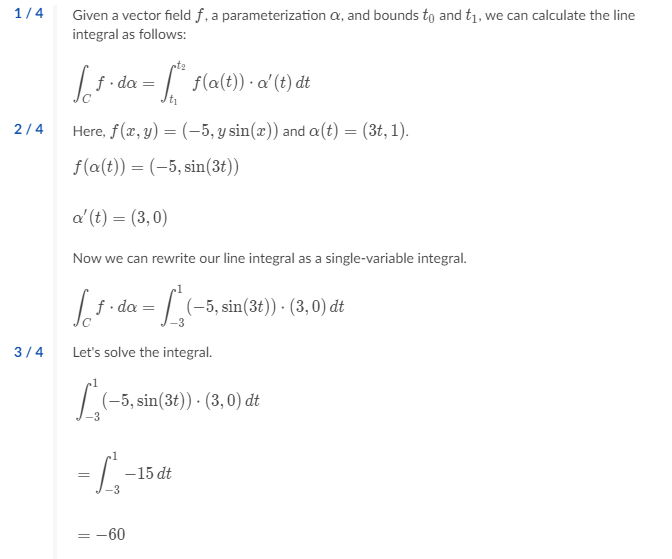

Also see [lecture video](https://www.khanacademy.org/video/line-integrals-and-vector-fields).

Using sympy:

Other cool things you can do with `vector_integrate`, see [here](https://docs.sympy.org/latest/modules/vector/api/vectorfunctions.html#vector-integrate).

In [52]:
import sympy
from sympy.vector import CoordSys3D, ParametricRegion, vector_integrate

In [53]:
C = CoordSys3D('C')
C

C

In [54]:
t = var('t')._sympy_()
x = var('x')._sympy_()
y = var('y')._sympy_()

region = ParametricRegion((3*t, 1), (t, -3, 1))
region

ParametricRegion((3*t, 1), (t, -3, 1))

In [55]:
vector_integrate(-5 * C.i + y * sin(x) * C.j, region)

-60

# Question 3*

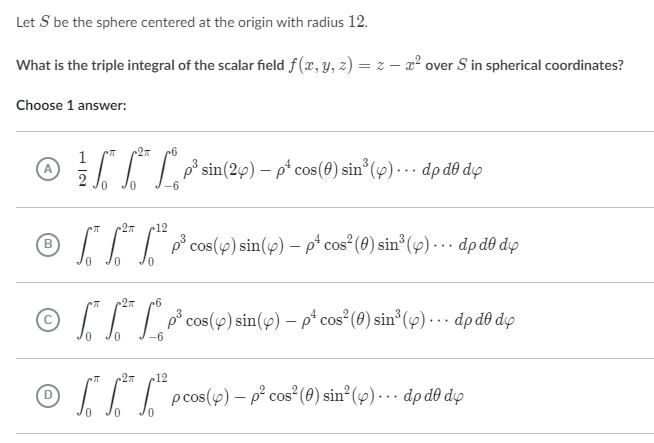

Hint:

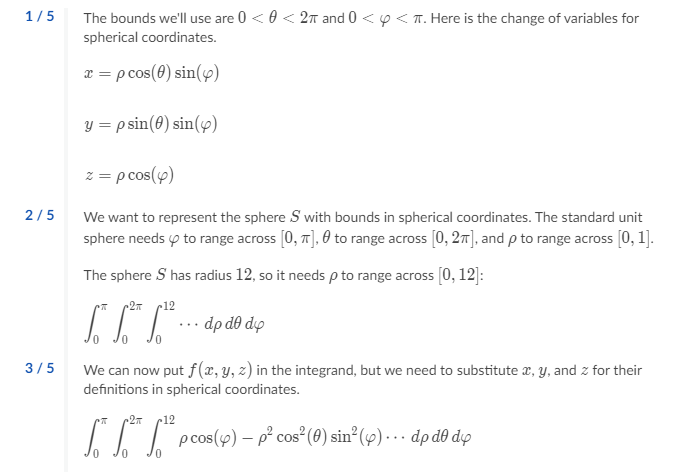

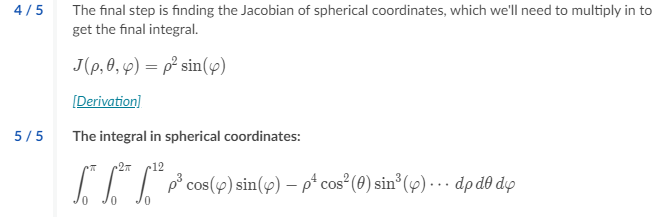

In [8]:
rho, theta, phi = var('rho theta phi')
x, y, z = var('x y z')

In [9]:
f(x, y, z) = z - x^2

Substitute $f(x, y, z)$ with sphere coordinates:

In [10]:
x_sphere = rho * cos(theta) * sin(phi)
y_sphere = rho * sin(theta) * sin(phi)
z_sphere = rho * cos(phi)

In [11]:
f_sub = f.substitute({
    x: x_sphere,
    y: y_sphere,
    z: z_sphere
}
)

f_sub(x, y, z)

-rho^2*cos(theta)^2*sin(phi)^2 + rho*cos(phi)

Find the jacobian:

In [12]:
j = vector([x_sphere, y_sphere, z_sphere])

J = jacobian(j, (rho, theta, phi))\
    .det()\
    .full_simplify()

J = abs(J)
J

abs(rho^2*sin(phi))

Integrate!

In [13]:
integrand = f_sub(x, y, z) * J
integrand.expand()

-rho^2*abs(rho^2*sin(phi))*cos(theta)^2*sin(phi)^2 + rho*abs(rho^2*sin(phi))*cos(phi)

In [14]:
# forcefully remove the abs() operator
t1 = integrand.operands()[1]
t2 = integrand.operands()[1].operands()[0]

integrand.substitute(t1 == t2).expand()

-rho^4*cos(theta)^2*sin(phi)^3 + rho^3*cos(phi)*sin(phi)

Actually solve it for fun:

In [15]:
integrate(integrand, rho, 0, 12)\
    .integrate(theta, 0, 2 * pi)\
    .integrate(phi, 0, pi)

-10368/5*integrate((24*pi*sin(phi)^2 - 5*pi*cos(phi))*abs(sin(phi)), phi, 0, pi)

In [16]:
integrate(integrand, rho, 0, 12)\
    .integrate(theta, 0, 2 * pi)\
    .integrate(phi, 0, pi)\
    .n(digits = 4)

-208500.

# Question 4*

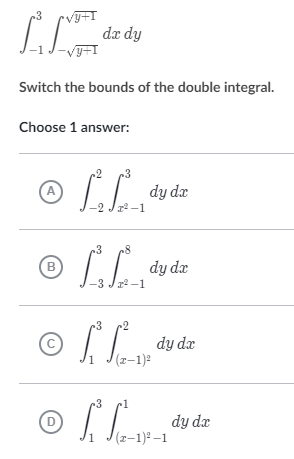

In [40]:
x, y = var('x y')

question = integrate(1, x, -sqrt(y+1), sqrt(y+1)).integrate(y, -1, 3)
ans_a = integrate(1, y, x^2-1, 3).integrate(x, -2, 2)
ans_b = integrate(1, y, x^2-1, 8).integrate(x, -3, 3)
ans_c = integrate(1, y, (x-1)^2, 2).integrate(x, 1, 3)
ans_d = integrate(1, y, (x-1)^2-1, 1).integrate(x, 1, 3)

In [41]:
question

32/3

In [42]:
ans_a

32/3

In [43]:
ans_b

36

In [44]:
ans_c

4/3

In [45]:
ans_d

4/3

Therefore, answer is A.

Hint:

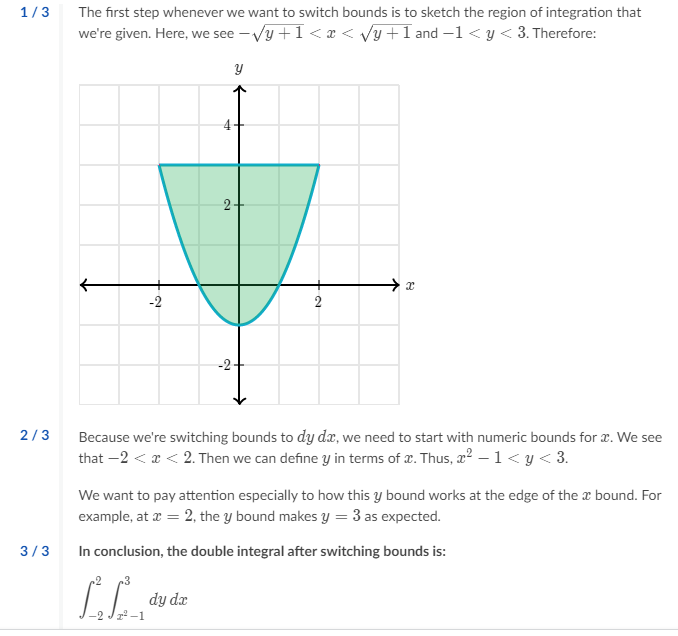

# Question 5*

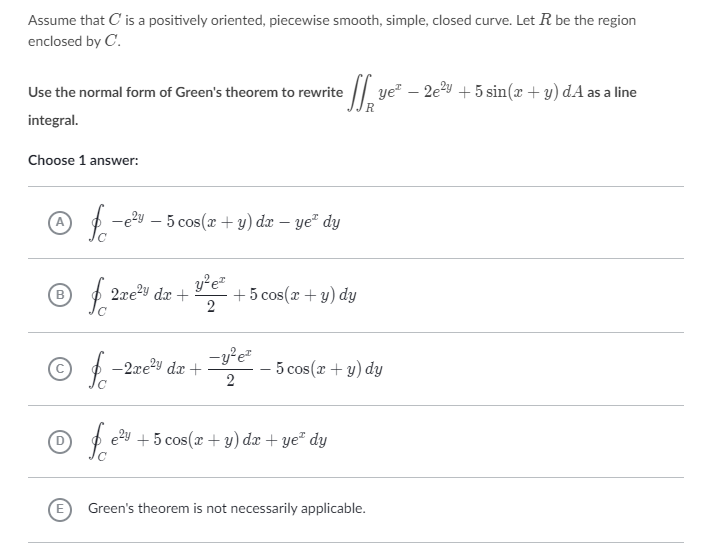


Hint:

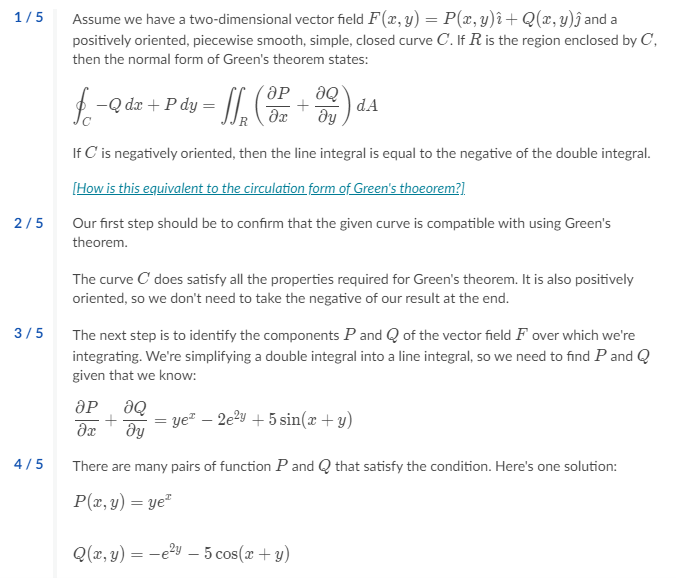

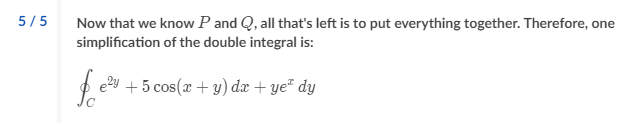

Lecture Video: [2D Divergence theorem](https://www.khanacademy.org/video/2-d-divergence-theorem)

# Question 6

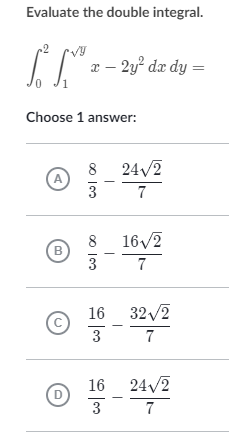

In [17]:
x, y = var('x y')

f(x,y) = x - 2*y^2
f

(x, y) |--> -2*y^2 + x

In [18]:
f.integrate(x, 1, sqrt(y)).integrate(y, 0, 2)

-32/7*sqrt(2) + 16/3

# Question 7*

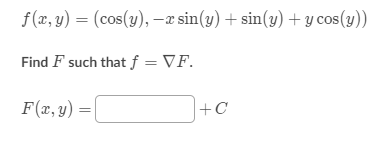

Answer:
    
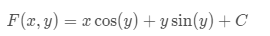    

Hint:
    
See this [lecture video](https://www.khanacademy.org/video/example-of-closed-line-integral-of-conservative-field)

# Question 8

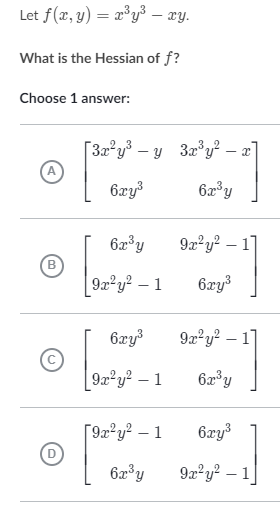

In [19]:
x, y = var('x y')
f(x, y) = x^3 * y^3 - x * y
f

(x, y) |--> x^3*y^3 - x*y

In [20]:
f(x,y).hessian()

[      6*x*y^3 9*x^2*y^2 - 1]
[9*x^2*y^2 - 1       6*x^3*y]

# Question 9

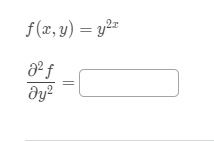

In [21]:
x, y = var('x y')
f(x, y) = y^(2*x)

In [22]:
f.diff(y, 2)

(x, y) |--> 2*(2*x - 1)*x*y^(2*x - 2)

# Question 10*

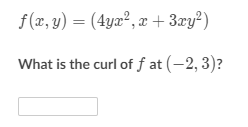

In [23]:
from sage.manifolds.operators import *

In [24]:
x, y = var('x y')

In [25]:
f = vector([4 * y * x^2, x + 3 * x * y^2])
f

(4*x^2*y, 3*x*y^2 + x)

Hint:

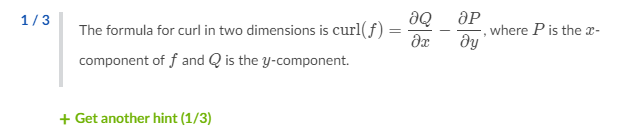

See [video lecture](https://www.khanacademy.org/video/2d-curl-formula)

# Question 11*

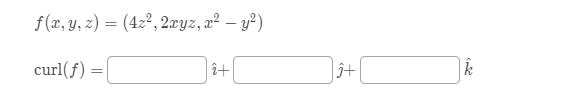

# Question 24*

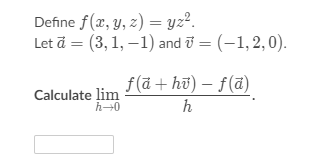

Answer is 2

# Question 26

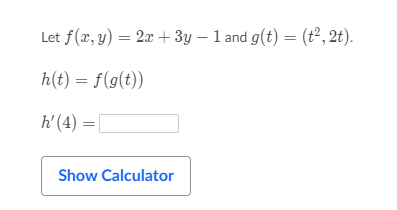

In [26]:
x, y, t = var('x y t')

f(x, y) = 2*x + 3*y - 1
g = vector([t^2, 2*t])

h(t) = f(g(t)[0], g(t)[1])
h

t |--> 2*t^2 + 6*t - 1

In [27]:
h.diff(t).substitute(t == 4)

t |--> 22

# Question 27

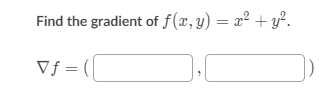

In [28]:
x, y = var('x y')
f(x, y) = x^2 + y^2
f

(x, y) |--> x^2 + y^2

In [29]:
f.gradient()

(x, y) |--> (2*x, 2*y)

# Quesiton 28*

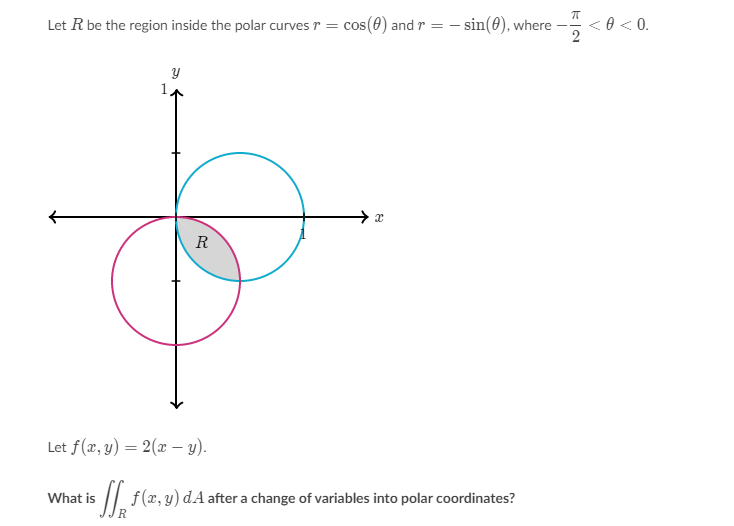

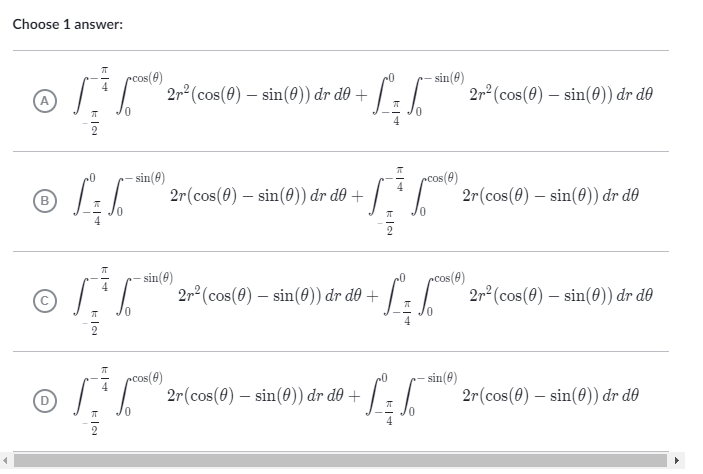

Hint:

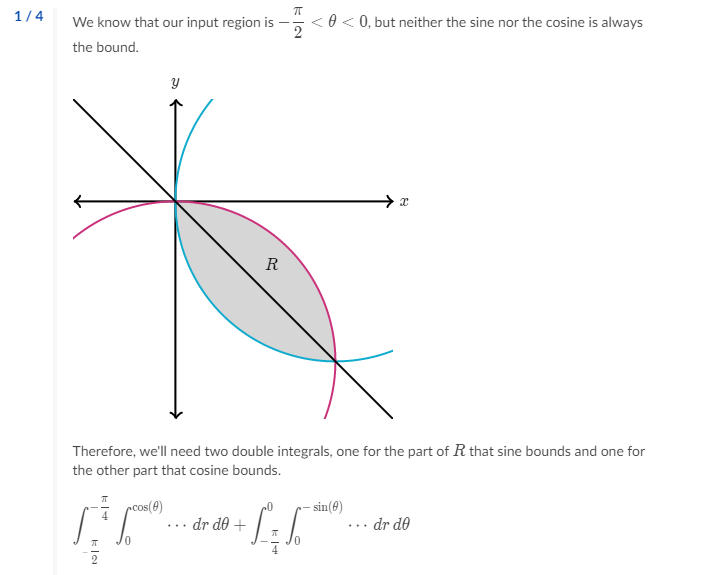

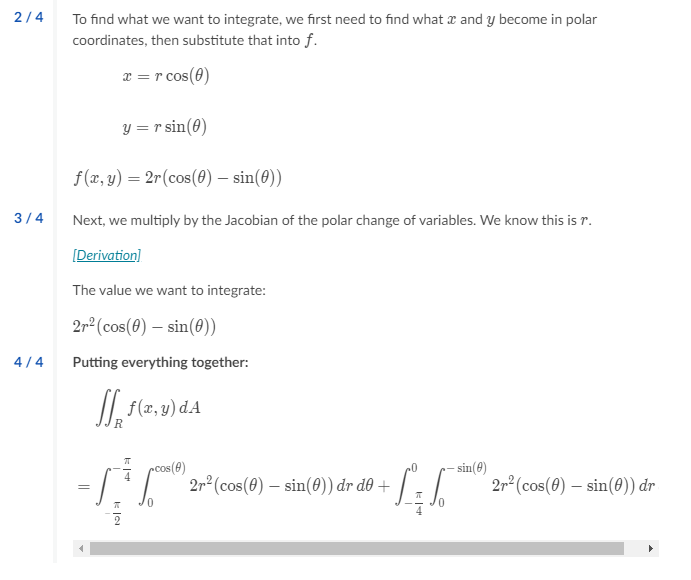

# Question 29

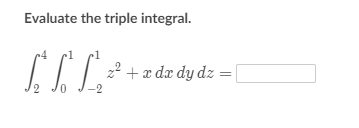

In [30]:
x, y, z = var('x y z')

f(x, y, z) = z^2 + x

In [31]:
f.integrate(x, -2, 1).integrate(y, 0, 1).integrate(z, 2, 4)

53

# Question 30

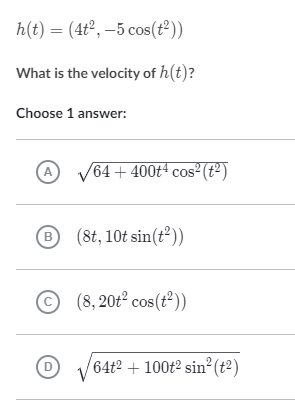

In [32]:
t = var('t')
h = vector([4*t^2, -5*cos(t^2)])
h

(4*t^2, -5*cos(t^2))

In [33]:
jacobian(h, t)

[          8*t]
[10*t*sin(t^2)]

Hint:
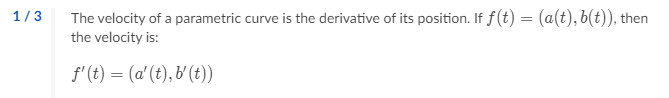